In [4]:
import pandas as pd

# Load the dataset
file_path = r'E:\Downloads\archive/Review.csv'
df = pd.read_csv(file_path)



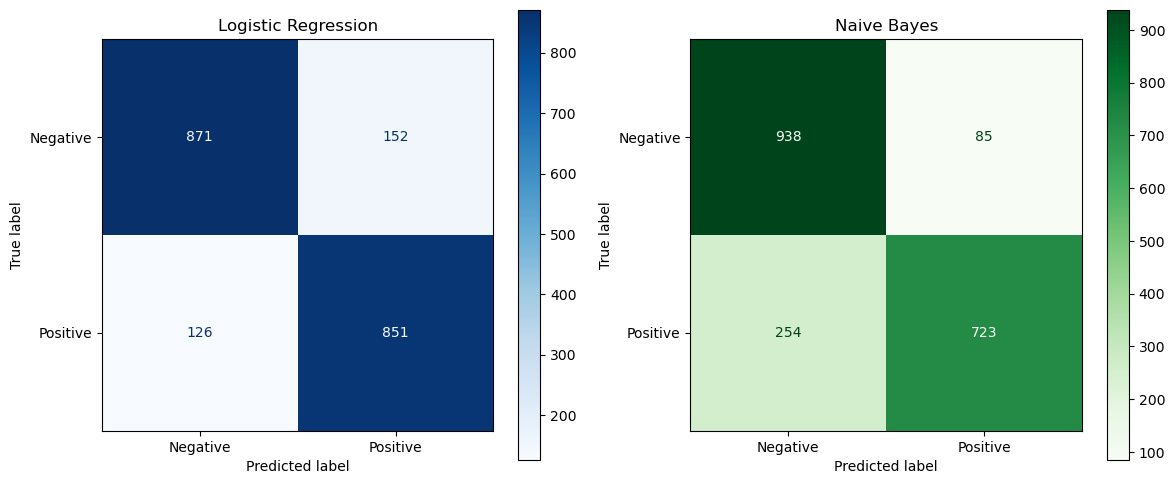

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.8610,0.848455,0.871034,0.859596
1,Naive Bayes,0.8305,0.894802,0.740020,0.810084


In [5]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Load dataset
df = pd.read_csv(file_path)

# Preprocess text
def simple_preprocess(text):
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)
    stopwords = {'the', 'and', 'is', 'in', 'it', 'of', 'to', 'this', 'that', 'i',
                 'was', 'a', 'for', 'with', 'on', 'as', 'but', 'are', 'not', 'have',
                 'be', 'had', 'at', 'my', 'they', 'so', 'we', 'you', 'if', 'me', 'his', 'her'}
    return " ".join([word for word in text.split() if word not in stopwords])

df["clean_review"] = df["review"].apply(simple_preprocess)
df["label"] = df["sentiment"].map({"Positive": 1, "Negative": 0})

# Split data
X = df["clean_review"]
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train models
log_model = LogisticRegression(max_iter=1000, solver='liblinear')
nb_model = MultinomialNB()

log_model.fit(X_train_vec, y_train)
nb_model.fit(X_train_vec, y_train)

# Predict
log_preds = log_model.predict(X_test_vec)
nb_preds = nb_model.predict(X_test_vec)

# Evaluation
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

for name, preds in [("Logistic Regression", log_preds), ("Naive Bayes", nb_preds)]:
    metrics["Model"].append(name)
    metrics["Accuracy"].append(accuracy_score(y_test, preds))
    metrics["Precision"].append(precision_score(y_test, preds))
    metrics["Recall"].append(recall_score(y_test, preds))
    metrics["F1 Score"].append(f1_score(y_test, preds))

# Confusion Matrix Plot
cm_log = confusion_matrix(y_test, log_preds)
cm_nb = confusion_matrix(y_test, nb_preds)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay(cm_log, display_labels=["Negative", "Positive"]).plot(ax=axs[0], cmap=plt.cm.Blues, values_format='d')
axs[0].set_title("Logistic Regression")
ConfusionMatrixDisplay(cm_nb, display_labels=["Negative", "Positive"]).plot(ax=axs[1], cmap=plt.cm.Greens, values_format='d')
axs[1].set_title("Naive Bayes")
plt.tight_layout()
plt.show()

# Create performance DataFrame
performance_df = pd.DataFrame(metrics)
performance_df
